In [191]:
h_0 = 3000                      # m
h_parachute_opening = 1000      # m
v_0 = 100                       # m / s

m = 80                          # kg
g = 9.81                        # m / s^2

density_air = 1.2754            # kg / m^3
density_human = 1000            # kg / m^3

k_parachute = 120                # N * c^2 / m
k_human = 10                    # N * c^2 / m

dt = 0.1                        #s

In [192]:
import math

T = []
X = []
Y = []
Vx = []
Vy = []
Ax = []
Ay = []

t = 0

x = 0
y = h_0

v_x = v_0
v_y = 0

while (y > 0):
    t += dt
    T.append(t)

    a_x = -k_human * v_x / m
    if y > h_parachute_opening:
        a_y = g * (density_air / density_human - 1) - k_human * v_y / m
    else:
        a_y = g * (density_air / density_human - 1) - k_parachute * v_y / m
    Ax.append(a_x)
    Ay.append(a_y)

    x += v_x * dt + a_x * dt * dt / 2
    y += v_y * dt + a_y * dt * dt / 2
    X.append(x)
    Y.append(y)

    v_x += a_x * dt
    v_y += a_y * dt
    Vx.append(v_x)
    Vy.append(v_y)

print(t)
print(math.sqrt(v_x ** 2 + v_y ** 2))


179.2999999999941
6.531658884000003


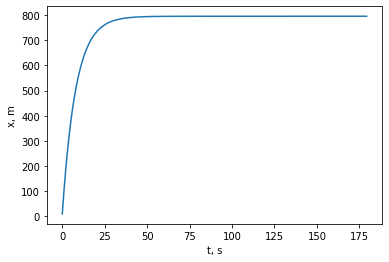

In [193]:
import matplotlib.pyplot as plt

plt.xlabel("t, s")
plt.ylabel("x, m")
plt.plot(T, X)

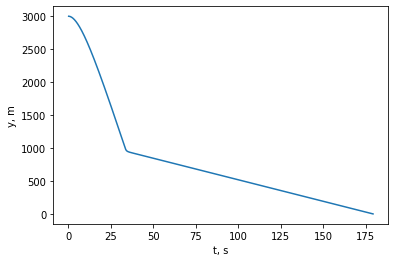

In [194]:
import matplotlib.pyplot as plt

plt.xlabel("t, s")
plt.ylabel("y, m")
plt.plot(T, Y)

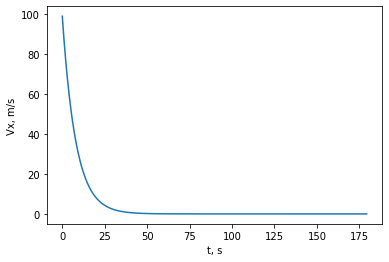

In [195]:
import matplotlib.pyplot as plt

plt.xlabel("t, s")
plt.ylabel("Vx, m/s")
plt.plot(T, Vx)

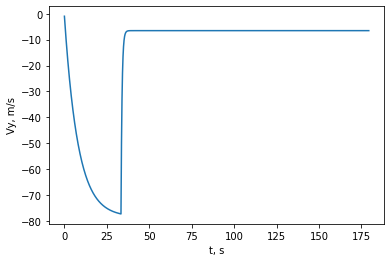

In [196]:
import matplotlib.pyplot as plt

plt.xlabel("t, s")
plt.ylabel("Vy, m/s")
plt.plot(T, Vy)

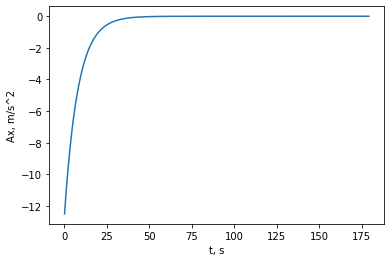

In [197]:
import matplotlib.pyplot as plt

plt.xlabel("t, s")
plt.ylabel("Ax, m/s^2")
plt.plot(T, Ax)

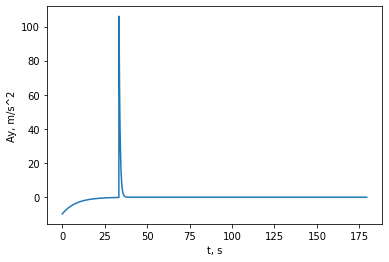

In [198]:
import matplotlib.pyplot as plt

plt.xlabel("t, s")
plt.ylabel("Ay, m/s^2")
plt.plot(T, Ay)

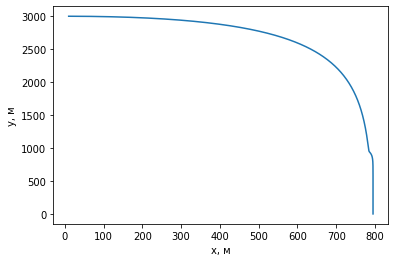

In [199]:
import matplotlib.pyplot as plt

plt.xlabel("x, м")
plt.ylabel("y, м")
plt.plot(X, Y)

In [200]:
import math


def v_last(h_po):
    y = h_0
    v_x = v_0
    v_y = 0
    while (y > 0):
        a_x = -k_human * v_x / m
        if y > h_po:
            a_y = g * (density_air / density_human - 1) - k_human * v_y / m
        else:
            a_y = g * (density_air / density_human - 1) - k_parachute * v_y / m
        y += v_y * dt + a_y * dt * dt / 2
        v_x += a_x * dt
        v_y += a_y * dt
    return math.sqrt(v_x ** 2 + v_y ** 2)


left = 0
right = h_0
v_safe = 6

for i in range(1, 100):
    mid = (left + right) / 2
    if (v_last(mid) <= v_safe):
        right = mid
    else:
        left = mid

print(right)


3000
